In [ ]:
import pandas as pd
import numpy as np
import pandas_profiling
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import seaborn as sns



In [ ]:
from google.colab import files
files.upload()

Saving mkta project.csv to mkta project.csv


{'mkta project.csv': b'Customer id ,purchase amount,date of purchase\r\n760,25,06-11-2009\r\n860,50,28-09-2012\r\n1200,100,25-10-2005\r\n1420,50,09-07-2009\r\n1940,70,25-01-2013\r\n1960,40,29-10-2013\r\n2620,30,09-03-2006\r\n3050,50,12-04-2007\r\n3120,150,08-11-2006\r\n3260,45,20-10-2010\r\n3510,35,04-05-2013\r\n3970,30,07-06-2007\r\n4000,20,25-11-2005\r\n4180,20,22-09-2010\r\n4390,30,15-04-2011\r\n4750,60,02-12-2013\r\n4840,30,14-10-2005\r\n4910,15,13-12-2006\r\n4950,50,19-05-2010\r\n4970,30,01-12-2006\r\n5250,50,20-12-2005\r\n5480,100,06-06-2014\r\n5990,30,17-03-2006\r\n6240,100,09-11-2006\r\n6390,15,25-10-2005\r\n6570,30,10-11-2012\r\n6600,50,23-09-2005\r\n6690,20,10-03-2010\r\n6690,15,04-11-2010\r\n6690,15,10-12-2013\r\n6710,80,03-05-2013\r\n6940,30,31-12-2013\r\n7000,10,05-04-2013\r\n7210,40,28-10-2009\r\n7450,25,23-05-2008\r\n7560,40,31-12-2008\r\n7660,30,03-06-2006\r\n7660,50,28-03-2013\r\n7730,150,22-10-2010\r\n7740,100,09-08-2007\r\n7790,20,04-07-2014\r\n8060,30,12-04-2007\r\n

DATA WRANGLING

In [ ]:
rfm=pd.read_csv('mkta project.csv')

In [ ]:
rfm.head()

,Customer id,purchase amount,date of purchase
0,760,25.0,06-11-2009
1,860,50.0,28-09-2012
2,1200,100.0,25-10-2005
3,1420,50.0,09-07-2009
4,1940,70.0,25-01-2013


In [ ]:
rfm.shape

(51243, 3)

In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer id       51243 non-null  int64  
 1   purchase amount   51243 non-null  float64
 2   date of purchase  51243 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ MB


In [ ]:
rfm.isna().sum()

Customer id         0
purchase amount     0
date of purchase    0
dtype: int64

In [ ]:
rfm['date of purchase']=pd.to_datetime(rfm['date of purchase'])

In [ ]:
rfm['year of purchase']=rfm['date of purchase'].dt.year
rfm['day of purchase']=rfm['date of purchase'].dt.weekday
rfm['month of purchase']=rfm['date of purchase'].dt.month


rfm

,Customer id,purchase amount,date of purchase,year of purchase,day of purchase,month of purchase
0,760,25.0,2009-06-11,2009,3,6
1,860,50.0,2012-09-28,2012,4,9
2,1200,100.0,2005-10-25,2005,1,10
3,1420,50.0,2009-09-07,2009,0,9
4,1940,70.0,2013-01-25,2013,4,1
...,...,...,...,...,...,...
51238,163230,30.0,2011-12-11,2011,6,12
51239,154410,100.0,2013-11-15,2013,4,11
51240,189270,30.0,2014-12-23,2014,1,12
51241,173810,30.0,2015-05-28,2015,3,5


In [ ]:
rfm['Customer id '].nunique() #No of unique customer ids

18417

In [ ]:
rfm.groupby('Customer id ',as_index=True).agg({'purchase amount':np.mean}).sort_values('purchase amount',ascending=False).head(5)
#Customer id 222740 and 246480 have the highest average purchase aamount

,purchase amount
Customer id,
222740,4500.0
246480,4500.0
126120,4000.0
216730,4000.0
247870,4000.0


In [ ]:
z=rfm.groupby('year of purchase',as_index=True).agg({'purchase amount':[np.mean,np.sum]})
z=pd.DataFrame(z)
#Purchase amount is increasing year on year
z



purchase amount           
                            mean        sum
year of purchase                           
2005                   55.826122   82064.40
2006                   52.250454  114010.49
2007                   49.264014  230260.00
2008                   53.071780  229853.88
2009                   50.745253  256466.51
2010                   58.740012  290116.92
2011                   63.519300  303939.85
2012                   62.913312  374963.34
2013                   67.931357  401610.18
2014                   75.390347  432665.20
2015                   77.197697  478394.13

In [ ]:
type(z)

pandas.core.frame.DataFrame

In [ ]:
rfm.groupby('day of purchase',as_index=True).agg({'purchase amount':[np.mean,np.sum]})
#We see average purchase amount is highest on wednesday eventhough it is similar on each day

purchase amount           
                           mean        sum
day of purchase                           
0                     65.732528  196540.26
1                     66.612246  431780.58
2                     60.446878  704447.92
3                     67.814223  539733.40
4                     57.634331  622681.31
5                     62.197417  505105.22
6                     60.023573  194056.21

In [ ]:
rfm_month=rfm.groupby('month of purchase',as_index=True).agg({'purchase amount':[np.mean,np.sum]})
rfm_month.columns
rfm_month.reset_index()

month of purchase purchase amount           
                                mean        sum
0                  1       57.165913  133425.24
1                  2       52.746178  102538.57
2                  3       57.805010  194629.47
3                  4       57.386762  238384.61
4                  5       76.401204  279170.00
5                  6       66.783820  165557.09
6                  7       51.793433  181484.19
7                  8       53.992496  123102.89
8                  9       65.946696  235297.81
9                 10       55.671628  298232.91
10                11       55.927679  298541.95
11                12       71.168589  943980.17

In [ ]:
rfm_month.columns

MultiIndex([('purchase amount', 'mean'),
            ('purchase amount',  'sum')],
           )

Text(0.5, 1.0, 'Sum of Monthly sales over 10 years')

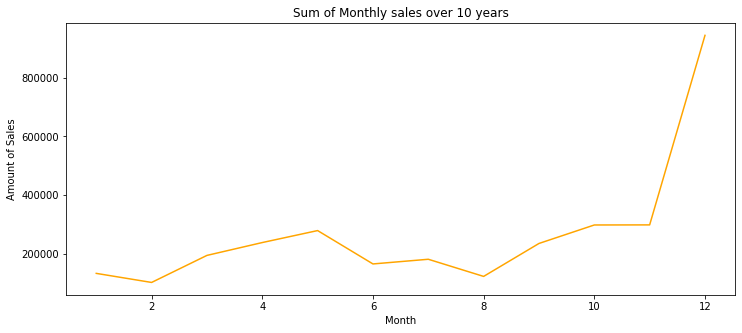

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(rfm_month[('purchase amount',  'sum')],color='orange')
plt.xlabel('Month')
plt.ylabel('Amount of Sales')
plt.title('Sum of Monthly sales over 10 years')

In [ ]:
rfm.describe()

,Customer id,purchase amount,year of purchase,day of purchase,month of purchase
count,51243.000000,51243.000000,51243.000000,51243.000000,51243.000000
mean,108934.547938,62.337195,2010.869699,3.061608,8.048299
std,67650.610139,156.606801,2.883072,1.633215,3.606340
min,10.000000,5.000000,2005.000000,0.000000,1.000000
25%,57720.000000,25.000000,2009.000000,2.000000,5.000000
50%,102440.000000,30.000000,2011.000000,3.000000,9.000000
75%,160525.000000,60.000000,2013.000000,4.000000,12.000000
max,264200.000000,4500.000000,2015.000000,6.000000,12.000000


In [ ]:
rfm.columns

Index(['Customer id ', 'purchase amount', 'date of purchase',
       'year of purchase', 'day of purchase', 'month of purchase'],
      dtype='object')

In [ ]:
#extracting Monetary
monetary = rfm.groupby('Customer id ').agg({'purchase amount':np.sum})
monetary = monetary.reset_index()
monetary.head()

,Customer id,purchase amount
0,10,30.0
1,80,500.0
2,90,1158.0
3,120,20.0
4,130,100.0


In [ ]:
#extracting Frequency
frequency=rfm['Customer id '].value_counts()
type(frequency)
k=pd.DataFrame(frequency)
k=k.reset_index()
k.columns = ['Customer id ', "Frequency"]
k.head()


,Customer id,Frequency
0,9720,45
1,109370,41
2,119430,38
3,10720,37
4,10640,34


In [ ]:
#creating master dataset
master = monetary.merge(k, on = 'Customer id ', how = "inner")
master.head()

,Customer id,purchase amount,Frequency
0,10,30.0,1
1,80,500.0,7
2,90,1158.0,10
3,120,20.0,1
4,130,100.0,2


In [ ]:
recency  = rfm[['Customer id ','date of purchase']]


In [ ]:
max_date=max(recency['date of purchase'])

In [ ]:
max_date

Timestamp('2015-12-31 00:00:00')

In [ ]:
#extracting recency
max_date = max_date + pd.DateOffset(days=1)
recency['diff'] = max_date - recency['date of purchase']
recency.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Customer id,date of purchase,diff
0,760,2009-06-11,2395 days
1,860,2012-09-28,1190 days
2,1200,2005-10-25,3720 days
3,1420,2009-09-07,2307 days
4,1940,2013-01-25,1071 days


In [ ]:
recency['date of purchase'].min()

Timestamp('2005-01-02 00:00:00')

In [ ]:
a = recency.groupby('Customer id ').agg({'diff':np.min})


In [ ]:
a.reset_index(inplace=True)
a

,Customer id,diff
0,10,3799 days
1,80,343 days
2,90,994 days
3,120,1459 days
4,130,2970 days
...,...,...
18412,263820,1 days
18413,263870,135 days
18414,263880,34 days
18415,263890,5 days


In [ ]:
RFM = k.merge(monetary, on = 'Customer id ')
RFM = RFM.merge(a, on = 'Customer id ')
RFM.head()

,Customer id,Frequency,purchase amount,diff
0,9720,45,2005.0,62 days
1,109370,41,695.0,1 days
2,119430,38,560.9,212 days
3,10720,37,970.0,34 days
4,10640,34,563.2,36 days


In [ ]:
RFM

,Customer id,Frequency,purchase amount,diff
0,9720,45,2005.0,62 days
1,109370,41,695.0,1 days
2,119430,38,560.9,212 days
3,10720,37,970.0,34 days
4,10640,34,563.2,36 days
...,...,...,...,...
18412,71860,1,40.0,3040 days
18413,2230,1,8.0,3362 days
18414,170180,1,100.0,1444 days
18415,15660,1,50.0,3908 days


In [ ]:
RFM['diff']=RFM['diff'].dt.days

In [ ]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18417 entries, 0 to 18416
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer id      18417 non-null  int64  
 1   Frequency        18417 non-null  int64  
 2   purchase amount  18417 non-null  float64
 3   diff             18417 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 719.4 KB


In [ ]:
RFM.describe()

,Customer id,Frequency,purchase amount,diff
count,18417.000000,18417.000000,18417.000000,18417.000000
mean,137573.510887,2.782375,173.445453,1266.472715
std,69504.599881,2.936888,540.339224,1076.093067
min,10.000000,1.000000,5.000000,1.000000
25%,81990.000000,1.000000,30.000000,281.000000
50%,136430.000000,2.000000,60.000000,1071.000000
75%,195100.000000,3.000000,150.000000,2131.000000
max,264200.000000,45.000000,24350.000000,4009.000000


In [ ]:
RFM_norm1 = RFM.drop(['Customer id '], axis=1)



**KMeans Clustering**

In [ ]:
sc=StandardScaler()
RFM_norm1 = sc.fit_transform(RFM_norm1)

In [ ]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Frequency','Amount','Recency']
RFM_norm1.head()

,Frequency,Amount,Recency
0,14.375341,3.389730,-1.119332
1,13.013319,0.965262,-1.176020
2,11.991802,0.717077,-0.979935
3,11.651296,1.474215,-1.145353
4,10.629779,0.721334,-1.143494


In [ ]:
kmeans=KMeans(n_clusters=5,random_state=123456)
kmeans.fit(RFM_norm1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123456, tol=0.0001, verbose=0)

In [ ]:
kpred=kmeans.predict(RFM_norm1)

In [ ]:
RFM_norm1['labels']=kpred

In [ ]:
RFM_norm1

,Frequency,Amount,Recency,labels
0,14.375341,3.389730,-1.119332,2
1,13.013319,0.965262,-1.176020,2
2,11.991802,0.717077,-0.979935,2
3,11.651296,1.474215,-1.145353,2
4,10.629779,0.721334,-1.143494,2
...,...,...,...,...
18412,-0.606909,-0.246973,1.648162,1
18413,-0.606909,-0.306196,1.947401,1
18414,-0.606909,-0.135928,0.164978,0
18415,-0.606909,-0.228465,2.454805,1


In [ ]:
RFM_norm1['labels'].value_counts()

0    9374
1    6428
2    2479
4     117
3      19
Name: labels, dtype: int64

In [ ]:
silhouette_score(RFM_norm1,RFM_norm1.labels)

0.5980522652556761

In [ ]:
kmeans.cluster_centers_

array([[-2.70362496e-01, -1.34800228e-01, -5.84634485e-01,
         1.38777878e-14],
       [-4.21399959e-01, -1.98701385e-01,  1.19204811e+00,
         2.00000000e+00],
       [ 2.02977820e+00,  5.55495218e-01, -8.41224541e-01,
         1.00000000e+00],
       [ 1.36443989e+00,  2.08858424e+01, -8.49831275e-01,
         4.00000000e+00],
       [ 1.58455085e+00,  6.55526654e+00, -6.88710661e-01,
         3.00000000e+00]])

In [ ]:
RFM_km = pd.concat([RFM, pd.Series(RFM_norm1['labels'])], axis=1)

In [ ]:
RFM_km

,Customer id,Frequency,purchase amount,diff,labels
0,9720,45,2005.0,62,2
1,109370,41,695.0,1,2
2,119430,38,560.9,212,2
3,10720,37,970.0,34,2
4,10640,34,563.2,36,2
...,...,...,...,...,...
18412,71860,1,40.0,3040,1
18413,2230,1,8.0,3362,1
18414,170180,1,100.0,1444,0
18415,15660,1,50.0,3908,1


In [ ]:
df1=RFM_km.groupby('labels').agg({'Frequency':[np.mean],'purchase amount':[np.mean,np.sum],'diff':[np.mean,'count']})

In [ ]:
df1.reset_index()



labels Frequency purchase amount                     diff      
              mean            mean         sum         mean count
0      0  1.988372      100.609580   943114.20   637.368679  9374
1      1  1.544804       66.082215   424776.48  2549.192595  6428
2      2  8.743445      473.593159  1174037.44   361.261396  2479
3      3  6.789474    11458.578947   217713.00   352.000000    19
4      4  7.435897     3715.416923   434703.78   525.376068   117

In [ ]:
df1.columns

MultiIndex([(      'Frequency',  'mean'),
            ('purchase amount',  'mean'),
            ('purchase amount',   'sum'),
            (           'diff',  'mean'),
            (           'diff', 'count')],
           )

In [ ]:
df1['contribution of each segment']=round((df1[('purchase amount',   'sum')]/np.sum(df1[('purchase amount',   'sum')])*100),2)

In [ ]:
df1

Frequency purchase amount  ...  diff contribution of each segment
            mean            mean  ... count                             
labels                            ...                                   
0       1.988372      100.609580  ...  9374                        29.52
1       1.544804       66.082215  ...  6428                        13.30
2       8.743445      473.593159  ...  2479                        36.75
3       6.789474    11458.578947  ...    19                         6.82
4       7.435897     3715.416923  ...   117                        13.61

[5 rows x 6 columns]

In [ ]:
RFM = RFM.rename(columns={'purchase amount': 'Monetary', 'diff': 'Recency'})

Manegarial Segmentation


In [ ]:
RFM

,Customer id,Frequency,Monetary,Recency
0,9720,45,2005.0,62
1,109370,41,695.0,1
2,119430,38,560.9,212
3,10720,37,970.0,34
4,10640,34,563.2,36
...,...,...,...,...
18412,71860,1,40.0,3040
18413,2230,1,8.0,3362
18414,170180,1,100.0,1444
18415,15660,1,50.0,3908


In [ ]:
# --Calculate R and F groups--
# Create labels for Recency and Frequency
r_labels = range(8, 0, -1); f_labels = range(1,9)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(RFM['Recency'],q=8, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.cut(RFM['Frequency'],bins=8, labels=f_labels)

# Create new columns R and F 
RFM = RFM.assign(R = r_groups.values,F=f_groups.values)

RFM.head()


,Customer id,Frequency,Monetary,Recency,R,F
0,9720,45,2005.0,62,8,8
1,109370,41,695.0,1,8,8
2,119430,38,560.9,212,7,7
3,10720,37,970.0,34,8,7
4,10640,34,563.2,36,8,6


In [ ]:
m_labels = range(1,9)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(RFM['Monetary'], q=8, labels=m_labels)
# Create new column M
RFM = RFM.assign(M = m_groups.values)

In [ ]:
f_groups.value_counts()

1    16477
2     1700
3      170
4       54
5        9
6        3
8        2
7        2
Name: Frequency, dtype: int64

In [ ]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
RFM['RFM_Segment_Concat'] = RFM.apply(join_rfm, axis=1)
RFM.head()

,Customer id,Frequency,Monetary,Recency,R,F,M,RFM_Segment_Concat
0,9720,45,2005.0,62,8,8,8,888
1,109370,41,695.0,1,8,8,8,888
2,119430,38,560.9,212,7,7,8,778
3,10720,37,970.0,34,8,7,8,878
4,10640,34,563.2,36,8,6,8,868


In [ ]:
rfm_count_unique = RFM.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(rfm_count_unique.sum())


124


In [ ]:
RFM['RFM_Score'] = RFM[['R','F','M']].sum(axis=1)
print(RFM['RFM_Score'].head())

0    24.0
1    24.0
2    22.0
3    23.0
4    22.0
Name: RFM_Score, dtype: float64


In [ ]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18417 entries, 0 to 18416
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customer id         18417 non-null  int64   
 1   Frequency           18417 non-null  int64   
 2   Monetary            18417 non-null  float64 
 3   Recency             18417 non-null  int64   
 4   R                   18417 non-null  category
 5   F                   18417 non-null  category
 6   M                   18417 non-null  category
 7   RFM_Segment_Concat  18417 non-null  object  
 8   RFM_Score           18417 non-null  float64 
dtypes: category(3), float64(2), int64(3), object(1)
memory usage: 1.0+ MB


In [ ]:
RFM['RFM_Score'].describe()

count    18417.000000
mean         9.927676
std          4.124131
min          3.000000
25%          7.000000
50%         10.000000
75%         13.000000
max         24.000000
Name: RFM_Score, dtype: float64

In [ ]:
# Define rfm_level function
def rfm_level(df):
  if df['RFM_Score'] > 21.375:
    return 'Can\'t Loose Them'
  elif ((df['RFM_Score'] >18.75) and (df['RFM_Score'] <= 21.375)):
    return 'Champions'
  elif ((df['RFM_Score'] >16.125) and (df['RFM_Score'] <=18.75)):
    return 'Loyal'
  elif ((df['RFM_Score'] >13.5) and (df['RFM_Score'] <=16.25)):
    return 'Potential'
  elif ((df['RFM_Score'] > 10.875) and (df['RFM_Score'] <= 13.5)):
    return 'Promising'
  elif ((df['RFM_Score'] > 8.25) and (df['RFM_Score'] <=10.875)):
    return 'Needs Attention'
  elif ((df['RFM_Score'] > 5.625) and (df['RFM_Score'] <=8.25)):
    return 'Require Activation'
  else:
    return 'Lost Customer'
  
# Create a new variable RFM_Level
RFM['RFM_Level'] = RFM.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
RFM.head()

,Customer id,Frequency,Monetary,Recency,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
0,9720,45,2005.0,62,8,8,8,888,24.0,Can't Loose Them
1,109370,41,695.0,1,8,8,8,888,24.0,Can't Loose Them
2,119430,38,560.9,212,7,7,8,778,22.0,Can't Loose Them
3,10720,37,970.0,34,8,7,8,878,23.0,Can't Loose Them
4,10640,34,563.2,36,8,6,8,868,22.0,Can't Loose Them


In [ ]:
rfm_level_agg1 = RFM.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count','sum']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg1)

                   Recency Frequency Monetary                 
                      mean      mean     mean count        sum
RFM_Level                                                     
Can't Loose Them      69.0      39.0    958.8     5     4794.1
Champions             49.3      18.0   1196.7   103   123255.0
Lost Customer       2749.3       1.1     21.6  2971    64205.3
Loyal                 74.3       8.7    792.2  1143   905514.4
Needs Attention     1208.4       1.8     82.4  3058   251891.0
Potential            253.7       4.9    369.7  2906  1074290.7
Promising            703.1       2.7    157.9  3718   587229.4
Require Activation  1776.9       1.4     40.6  4513   183165.0


In [ ]:
rfm_level_agg1.columns

MultiIndex([(  'Recency',  'mean'),
            ('Frequency',  'mean'),
            ( 'Monetary',  'mean'),
            ( 'Monetary', 'count')],
           )

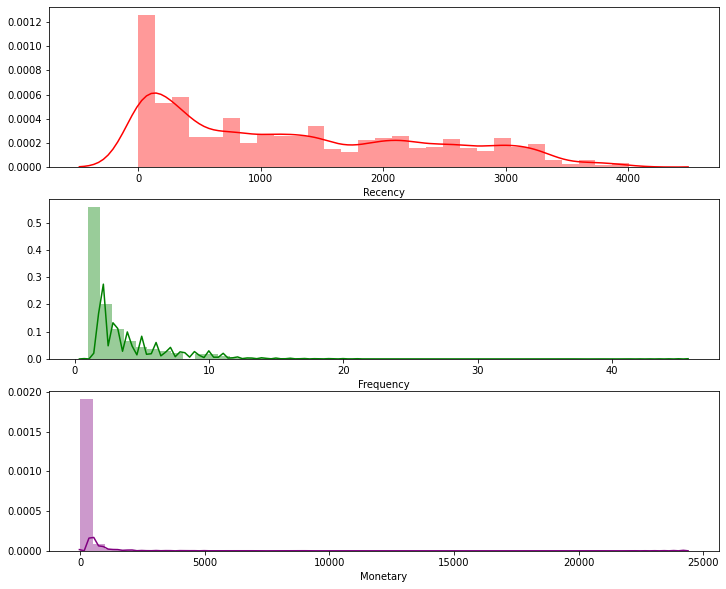

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); 
sns.distplot(RFM['Recency'],color='r')
# Plot distribution of F
plt.subplot(3, 1, 2); 
sns.distplot(RFM['Frequency'],color='g')
# Plot distribution of M
plt.subplot(3, 1, 3); 
sns.distplot(RFM['Monetary'],color='purple')



In [ ]:
RFM.describe()

,Customer id,Frequency,Monetary,Recency,RFM_Score
count,18417.000000,18417.000000,18417.000000,18417.000000,18417.000000
mean,137573.510887,2.782375,173.445453,1266.472715,9.927676
std,69504.599881,2.936888,540.339224,1076.093067,4.124131
min,10.000000,1.000000,5.000000,1.000000,3.000000
25%,81990.000000,1.000000,30.000000,281.000000,7.000000
50%,136430.000000,2.000000,60.000000,1071.000000,10.000000
75%,195100.000000,3.000000,150.000000,2131.000000,13.000000
max,264200.000000,45.000000,24350.000000,4009.000000,24.000000


In [ ]:
rfm_level_agg=rfm_level_agg.iloc[:,1:5]

In [ ]:
rfm_level_agg1['percentage contribution']=round((rfm_level_agg1[( 'Monetary',   'sum')]/np.sum(rfm_level_agg1[( 'Monetary',   'sum')])*100),2)




In [ ]:
rfm_level_agg1

Recency Frequency  ...   Monetary percentage contribution
                      mean      mean  ...        sum                        
RFM_Level                             ...                                   
Can't Loose Them      69.0      39.0  ...     4794.1                    0.15
Champions             49.3      18.0  ...   123255.0                    3.86
Lost Customer       2749.3       1.1  ...    64205.3                    2.01
Loyal                 74.3       8.7  ...   905514.4                   28.35
Needs Attention     1208.4       1.8  ...   251891.0                    7.89
Potential            253.7       4.9  ...  1074290.7                   33.63
Promising            703.1       2.7  ...   587229.4                   18.38
Require Activation  1776.9       1.4  ...   183165.0                    5.73

[8 rows x 6 columns]